# Model Modified Beta PDFs using a Lambda
### Compares Symmetical and Asymmetrical Distributions using the modified alpha and beta
D.M. Advocate, Feburary 2022

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top


## Modified Beta Distribution (Method 2) - Plots a family of Beta Distributions
- Method 2 has a modified formula for the shape parameters alpha (a) and beta (b) that can increase or decrease the spread of the distribution. The parameter Lambda (L) is used to modify the spread, where L=10 approximates the normal distribution. Smaller values (L < 10) increase the spread with .01 approximating a uniform distribution. L > 10 decreases the spread of the distribution.
- The method is based on Heiko Onnen's 2021 article HANDS-ON TUTORIAL, Python Scenario Analysis: Modeling Expert Estimates with the beta-PERT Distribution, And How to Add a New, User-Defined Distribution to SciPy’s Catalogue,
- https://towardsdatascience.com/python-scenario-analysis-modeling-expert-estimates-with-the-beta-pert-distribution-22a5e90cfa79

###### Method 1 - Calculate 𝛼 and 𝛽  - Original method that has no control over dispersion
- 𝛼 = (4mode + max - 5min) / (max - min)
- 𝛽 = (5max - min -4mode) / (max - min)

##### Method 2 - Calculate 𝛼 and 𝛽  - modified method with a dispersion parameter (𝜆 ) 
- 𝛼=1+ 𝜆 * (mode - min) / (max - min)
- 𝛽=1+ 𝜆 * (max - mode) / (max - min)



### Plot Symmetic Family of Curves using Method 2

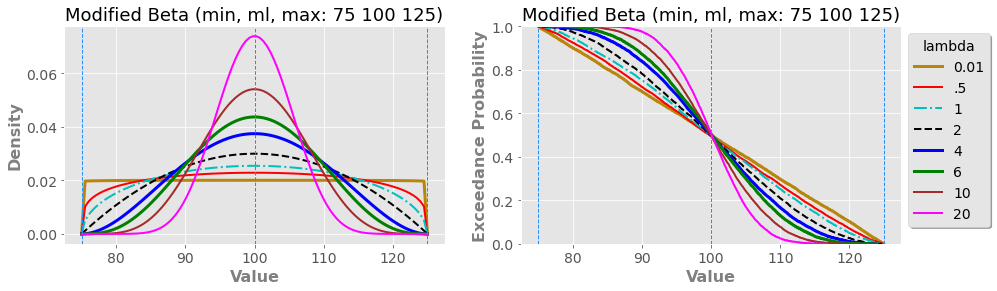

In [2]:
# Produce a family of Symmetric Beta Curves using METHOD 2

# Set Min, Ml, Max and Size parameters
amin=75      # Minimum Value 
bml=100      # Most-Likely Value
cmax=125     # Maximum Value
size=10000   # Number of random samples for the distribution

########## This code is incorporated in the Loop Below ###################
# L = 4  #Default gamma is 4. Smaller values flatten and larger values peak
# a=1+L*(bml-amin)/(cmax-amin)
# b=1+L*(cmax-bml)/(cmax-amin)
#############################################################

# Set X values to be evaluated
fbx = np.linspace(amin, cmax, 100)

# Calculate PDF and random values
# Loop through Lambda values (L) to be evaluated: .01, .5, 2, 4, 6, 10, & 20
### Note, Lambda must be set to interger values to concatenate them on variable name
### However, this is corrected in the formulas by dividing i by 100

L=[1, 50, 100, 200, 400, 600, 1000, 2000] 
for i in L:
    globals()["fby_"+str(i)] = beta.pdf(fbx, 1+i/100*(bml-amin)/(cmax-amin), 1+i/100*(cmax-bml)/(cmax-amin), loc=amin, scale=cmax-amin)
    globals()["fbvals_"+str(i)] =beta.rvs(1+i/100*(bml-amin)/(cmax-amin), 1+i/100*(cmax-bml)/(cmax-amin),
                                          loc=amin, scale=cmax-amin, size=size, random_state=None)
# Plotting    
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,4))
#ax1.hist(fbx, bins=30, edgecolor='gray', density=True, alpha=.2)
ax1.plot(fbx, fby_1  ,lw=3, c='darkgoldenrod', ls='-', label='0.01')
ax1.plot(fbx, fby_50 ,lw=2, c='r', ls='-', label='0.5')
ax1.plot(fbx, fby_100,lw=2, c='c', ls='-.', label='1')
ax1.plot(fbx, fby_200,lw=2, c='k', ls='--', label='2')
ax1.plot(fbx, fby_400,lw=3, c='b', ls='-', label='4')
ax1.plot(fbx, fby_600,lw=3, c='g', ls='-', label='6')
ax1.plot(fbx, fby_1000,lw=2, c='brown', ls='-', label='10')
ax1.plot(fbx, fby_2000,lw=2, c='magenta', ls='-', label='20')
ax1.set_title('Modified Beta (min, ml, max: '+ str(amin)+' '+str(bml)+' ' + str(cmax)+')', fontsize=18)       
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#ax1.legend(fontsize=14, title='lambda', shadow=True)

sns.ecdfplot(fbvals_1, lw=3, c='darkgoldenrod', ls='-', label='0.01', complementary=True)
sns.ecdfplot(fbvals_50,lw=2, c='r', ls='-', label='.5', complementary=True)
sns.ecdfplot(fbvals_100,lw=2, c='c', ls='-.', label='1', complementary=True)
sns.ecdfplot(fbvals_200,lw=2, c='k', ls='--', label='2', complementary=True)
sns.ecdfplot(fbvals_400,lw=3, c='b', ls='-', label='4', complementary=True)
sns.ecdfplot(fbvals_600,lw=3, c='g', ls='-', label='6', complementary=True)
sns.ecdfplot(fbvals_1000,lw=2, c='brown', ls='-', label='10', complementary=True)
sns.ecdfplot(fbvals_2000,lw=2, c='magenta', ls='-', label='20', complementary=True)
ax2.legend(fontsize=14, title='lambda', shadow=True, bbox_to_anchor = (1.0, 1.0))
ax2.set_title('Modified Beta (min, ml, max: '+ str(amin)+' '+str(bml)+' ' + str(cmax)+')', fontsize=18)
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('Exceedance Probability', fontsize =16, fontweight='bold', color='gray')

ax1.axvline(x=amin, color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=bml,  color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=cmax, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=amin, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=bml,  color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=cmax, color='dodgerblue', lw=1, linestyle='--')

plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Flattened Beta.png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

### Plot Asymmetic Family of Curves using Method 2

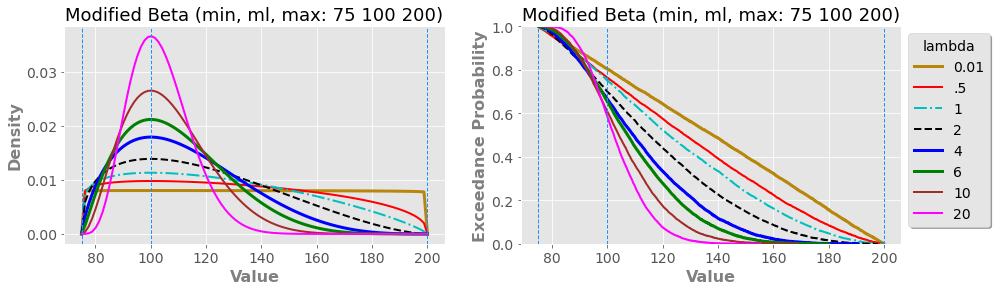

In [3]:
# Produce a family of Symmetric Beta Curves using METHOD 2

# Set Min, Ml, Max and Size parameters
amin2=75     # Minimum Value 
bml2=100     # Most-Likely Value
cmax2=200    # Maximum Value
size=10000   # Number of random samples for the distribution

########## This code is incorporated in the Loop Below ###################
# L = 4  #Default gamma is 4. Smaller values flatten and large vaues peak
# a=1+L*(bml-amin)/(cmax-amin)
# b=1+L*(cmax-bml)/(cmax-amin)
#############################################################

# Set X values to be evaluated
fbx2 = np.linspace(amin2, cmax2, 100)

# Calculate PDF and random values
# Loop through Lambda values (L) to be evaluated: .01, .5, 2, 4, 6, 10, & 20
### Note, Lambda must be set to interger values to concatenate them on variable name
### However, this is corrected in the formulas by dividing i by 100
L=[1, 50, 100, 200, 400, 600, 1000, 2000] 
for i in L:
    globals()["fby2_"+str(i)] = beta.pdf(fbx2, 1+i/100*(bml2-amin2)/(cmax2-amin2), 1+i/100*(cmax2-bml2)/(cmax2-amin2),
                                         loc=amin2, scale=cmax2-amin2)
    globals()["fbvals2_"+str(i)] =beta.rvs(1+i/100*(bml2-amin2)/(cmax2-amin2), 1+i/100*(cmax2-bml2)/(cmax2-amin2),
                                        loc=amin2, scale=cmax2-amin2, size=size, random_state=None)
# Plotting    
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
#ax1.hist(fbx, bins=30, edgecolor='gray', density=True, alpha=.2)
ax1.plot(fbx2, fby2_1  ,lw=3, c='darkgoldenrod', ls='-', label='0.01')
ax1.plot(fbx2, fby2_50 ,lw=2, c='r', ls='-', label='0.5')
ax1.plot(fbx2, fby2_100,lw=2, c='c', ls='-.', label='1')
ax1.plot(fbx2, fby2_200,lw=2, c='k', ls='--', label='2')
ax1.plot(fbx2, fby2_400,lw=3, c='b', ls='-', label='4')
ax1.plot(fbx2, fby2_600,lw=3, c='g', ls='-', label='6')
ax1.plot(fbx2, fby2_1000,lw=2, c='brown', ls='-', label='10')
ax1.plot(fbx2, fby2_2000,lw=2, c='magenta', ls='-', label='20')
ax1.set_title('Modified Beta (min, ml, max: '+ str(amin2)+' '+str(bml2)+' ' + str(cmax2)+')', fontsize=18)       
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#ax1.legend(fontsize=14, title='lambda', shadow=True)

sns.ecdfplot(fbvals2_1, lw=3, c='darkgoldenrod', ls='-', label='0.01', complementary=True)
sns.ecdfplot(fbvals2_50,lw=2, c='r', ls='-', label='.5', complementary=True)
sns.ecdfplot(fbvals2_100,lw=2, c='c', ls='-.', label='1', complementary=True)
sns.ecdfplot(fbvals2_200,lw=2, c='k', ls='--', label='2', complementary=True)
sns.ecdfplot(fbvals2_400,lw=3, c='b', ls='-', label='4', complementary=True)
sns.ecdfplot(fbvals2_600,lw=3, c='g', ls='-', label='6', complementary=True)
sns.ecdfplot(fbvals2_1000,lw=2, c='brown', ls='-', label='10', complementary=True)
sns.ecdfplot(fbvals2_2000,lw=2, c='magenta', ls='-', label='20', complementary=True)
ax2.legend(fontsize=14, title='lambda', shadow=True, bbox_to_anchor = (1.0, 1.0))
ax2.set_title('Modified Beta (min, ml, max: '+ str(amin2)+' '+str(bml2)+' ' + str(cmax2)+')', fontsize=18)
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('Exceedance Probability', fontsize =16, fontweight='bold', color='gray')

ax1.axvline(x=amin2, color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=bml2,  color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=cmax2, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=amin2, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=bml2,  color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=cmax2, color='dodgerblue', lw=1, linestyle='--')

plt.show()

# ################################################# Change Directory and write files
# ##os.mkdir("../Figures")                         # Run once to create a directory
# os.chdir("../Figures")                          # Change directory
# ## print(os.path.abspath(os.curdir))

# fig.savefig('Flattened Beta.png', bbox_inches='tight', dpi=150)
# os.chdir("../Scripts")                          # Change Directory back to original for saving script
# print(os.path.abspath(os.curdir))
# ################################################ End of save figure script

## Compare Symmetrical and Skewed Probability Distributions

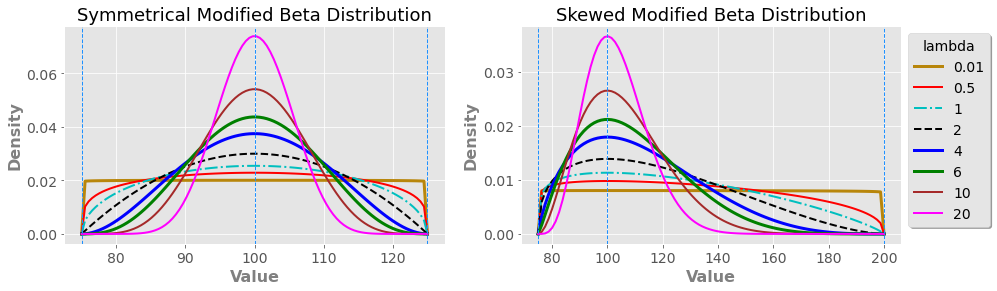

In [4]:
# Plot the two sets of PDFs from above side by side
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
ax1.plot(fbx, fby_1  ,lw=3, c='darkgoldenrod', ls='-', label='0.01')
ax1.plot(fbx, fby_50 ,lw=2, c='r', ls='-', label='0.5')
ax1.plot(fbx, fby_100,lw=2, c='c', ls='-.', label='1')
ax1.plot(fbx, fby_200,lw=2, c='k', ls='--', label='2')
ax1.plot(fbx, fby_400,lw=3, c='b', ls='-', label='4')
ax1.plot(fbx, fby_600,lw=3, c='g', ls='-', label='6')
ax1.plot(fbx, fby_1000,lw=2, c='brown', ls='-', label='10')
ax1.plot(fbx, fby_2000,lw=2, c='magenta', ls='-', label='20')
ax1.set_title('Symmetrical Modified Beta Distribution', fontsize=18)       
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
#ax1.legend(fontsize=14, title='lambda', shadow=True)

ax2.plot(fbx2, fby2_1  ,lw=3, c='darkgoldenrod', ls='-', label='0.01')
ax2.plot(fbx2, fby2_50 ,lw=2, c='r', ls='-', label='0.5')
ax2.plot(fbx2, fby2_100,lw=2, c='c', ls='-.', label='1')
ax2.plot(fbx2, fby2_200,lw=2, c='k', ls='--', label='2')
ax2.plot(fbx2, fby2_400,lw=3, c='b', ls='-', label='4')
ax2.plot(fbx2, fby2_600,lw=3, c='g', ls='-', label='6')
ax2.plot(fbx2, fby2_1000,lw=2, c='brown', ls='-', label='10')
ax2.plot(fbx2, fby2_2000,lw=2, c='magenta', ls='-', label='20')
ax2.set_title('Skewed Modified Beta Distribution', fontsize=18)       
ax2.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
ax2.legend(fontsize=14, title='lambda', shadow=True, bbox_to_anchor = (1.0, 1.0))

ax1.axvline(x=75, color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=100,  color='dodgerblue', lw=1, linestyle='--')
ax1.axvline(x=125, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=75, color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=100,  color='dodgerblue', lw=1, linestyle='--')
ax2.axvline(x=200, color='dodgerblue', lw=1, linestyle='--')

plt.show()

################################################# Change Directory and write files
#os.mkdir("../Figures")                         # Run once to create a directory
#os.chdir("../Figures")                          # Change directory
# print(os.path.abspath(os.curdir))

#fig.savefig('Compare Flat Distributions', bbox_inches='tight', dpi=150)
#os.chdir("../Scripts")                          # Change Directory back to original for saving script
#print(os.path.abspath(os.curdir))
################################################ End of save figure script

### Descriptive Statistics for Symmetical Distribution
- Create a table of descriptive statistics in a pandas dataframe
- Plot Lambda Vs Standard Deviations to demonstate how dispersion varies linearly with Lambda

,Lambda,mean,sem,min,max,std,skew_,kurtosis,P95,P50,P05,pct_delta_std
0,0.01,100.03,0.14,75.01,124.98,14.38,0.00,-1.19,77.59,99.99,122.48,-0.08
1,0.5,99.85,0.13,75.01,124.99,13.35,0.01,-1.09,78.61,99.77,121.19,-0.07
2,1,99.97,0.13,75.09,124.98,12.52,-0.00,-0.99,79.72,99.91,119.99,-0.13
3,2,99.86,0.11,75.07,124.59,11.10,0.01,-0.86,81.86,99.87,118.01,-0.17
4,4,100.06,0.10,75.69,123.85,9.52,0.00,-0.63,84.32,100.03,115.72,-0.13
5,6,100.10,0.08,76.55,123.80,8.43,-0.01,-0.58,86.19,100.10,114.02,-0.22
6,10,99.98,0.07,79.89,121.78,6.90,0.01,-0.40,88.60,99.92,111.31,-0.33
7,20,100.07,0.05,79.02,116.84,5.17,-0.02,-0.19,91.50,100.11,108.54,nan


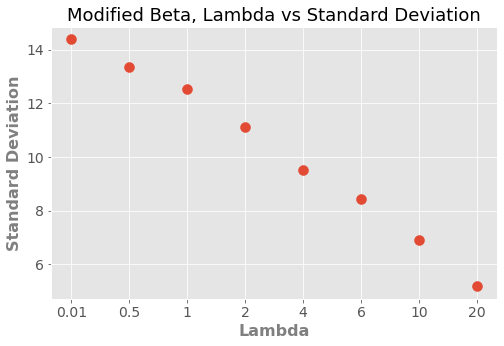

In [5]:
db = {'Lambda' : ['0.01', '0.5', '1', '2', '4', '6', '10', '20'],
     'mean': [np.mean(fbvals_1), np.mean(fbvals_50), np.mean(fbvals_100), np.mean(fbvals_200), np.mean(fbvals_400), np.mean(fbvals_600), np.mean(fbvals_1000), np.mean(fbvals_2000)],
     'sem':  [stats.sem(fbvals_1), stats.sem(fbvals_50), stats.sem(fbvals_100), stats.sem(fbvals_200), stats.sem(fbvals_400), stats.sem(fbvals_600), stats.sem(fbvals_1000), stats.sem(fbvals_2000)],
     'min':  [np.min(fbvals_1), np.min(fbvals_50), np.min(fbvals_100), np.min(fbvals_200), np.min(fbvals_400), np.min(fbvals_600), np.min(fbvals_1000), np.min(fbvals_2000)],
     'max':  [np.max(fbvals_1), np.max(fbvals_50), np.max(fbvals_100), np.max(fbvals_200), np.max(fbvals_400), np.max(fbvals_600), np.max(fbvals_1000), np.max(fbvals_2000)],
     'std':  [np.std(fbvals_1), np.std(fbvals_50), np.std(fbvals_100), np.std(fbvals_200), np.std(fbvals_400), np.std(fbvals_600), np.std(fbvals_1000), np.std(fbvals_2000)],
     'skew_': [skew(fbvals_1), skew(fbvals_50), skew(fbvals_100), skew(fbvals_200), skew(fbvals_400), skew(fbvals_600), skew(fbvals_1000), skew(fbvals_2000)],
     'kurtosis': [kurtosis(fbvals_1), kurtosis(fbvals_50), kurtosis(fbvals_100), kurtosis(fbvals_200), kurtosis(fbvals_400), kurtosis(fbvals_600), kurtosis(fbvals_1000), kurtosis(fbvals_2000)],
     'P95':  [np.percentile(fbvals_1,5), np.percentile(fbvals_50,5), np.percentile(fbvals_100,5), np.percentile(fbvals_200,5), np.percentile(fbvals_400,5), np.percentile(fbvals_600, 5), np.percentile(fbvals_1000, 5), np.percentile(fbvals_2000, 5)],
     'P50':  [np.percentile(fbvals_1,50), np.percentile(fbvals_50,50), np.percentile(fbvals_100,50), np.percentile(fbvals_200,50), np.percentile(fbvals_400,50), np.percentile(fbvals_600, 50), np.percentile(fbvals_1000, 50), np.percentile(fbvals_2000, 50)],
     'P05':  [np.percentile(fbvals_1,95), np.percentile(fbvals_50,95), np.percentile(fbvals_100,95), np.percentile(fbvals_200,95), np.percentile(fbvals_400,95), np.percentile(fbvals_600, 95), np.percentile(fbvals_1000, 95), np.percentile(fbvals_2000, 95)]}  
df_stats_beta = pd.DataFrame(data=db) #.set_index('DisType')
df_stats_beta['pct_delta_std']=(df_stats_beta['std'].shift(-1)-df_stats_beta['std'])/df_stats_beta['std'].shift(-1)
pd.options.display.float_format = "{:,.2f}".format
df_stats_beta.style.set_table_attributes('style="font-size: 24px"')
display(df_stats_beta)

fig=plt.subplots(figsize=(8,5))
plt.scatter(df_stats_beta['Lambda'],df_stats_beta['std'], s=100)
plt.title('Modified Beta, Lambda vs Standard Deviation', fontsize=18)       
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Standard Deviation', fontsize =16, fontweight='bold', color='gray')
plt.show()

### Discriptive Statistics for the Skewed Beta
- Create a table of descriptive statistics in a pandas dataframe
- Plot Lambda Vs Standard Deviations to demonstate how dispersion varies linearly with Lambda

,Lambda,mean,sem,min,max,std,skew_,kurtosis,P95,P50,P05,pct_delta_std
0,0.01,137.72,0.36,75.00,199.99,35.81,-0.01,-1.20,81.72,138.13,193.13,-0.08
1,0.5,130.07,0.33,75.01,199.93,33.29,0.19,-1.05,80.65,128.13,186.52,-0.09
2,1,125.58,0.31,75.09,199.85,30.50,0.31,-0.88,81.42,122.19,179.49,-0.13
3,2,118.59,0.27,75.07,197.46,26.89,0.47,-0.60,81.00,115.08,167.73,-0.25
4,4,112.23,0.22,75.22,190.73,21.52,0.55,-0.29,82.04,109.36,151.72,-0.17
5,6,109.75,0.18,75.44,180.03,18.45,0.57,-0.14,83.65,107.36,143.98,-0.23
6,10,105.95,0.15,76.40,168.76,15.03,0.61,0.14,84.38,104.14,133.11,-0.38
7,20,103.48,0.11,77.61,155.38,10.91,0.54,0.21,87.52,102.37,122.91,nan


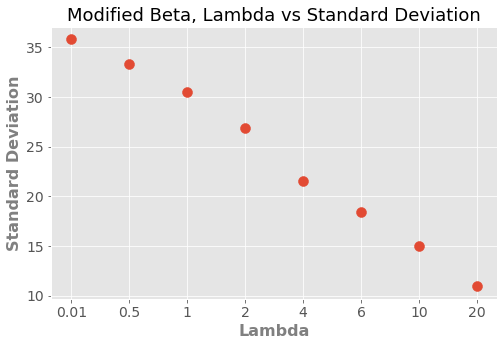

In [6]:
db2 = {'Lambda' : ['0.01', '0.5', '1', '2', '4', '6', '10', '20'],
     'mean': [np.mean(fbvals2_1), np.mean(fbvals2_50), np.mean(fbvals2_100), np.mean(fbvals2_200), np.mean(fbvals2_400), np.mean(fbvals2_600), np.mean(fbvals2_1000), np.mean(fbvals2_2000)],
     'sem':  [stats.sem(fbvals2_1), stats.sem(fbvals2_50), stats.sem(fbvals2_100), stats.sem(fbvals2_200), stats.sem(fbvals2_400), stats.sem(fbvals2_600), stats.sem(fbvals2_1000), stats.sem(fbvals2_2000)],
     'min':  [np.min(fbvals2_1), np.min(fbvals2_50), np.min(fbvals2_100), np.min(fbvals2_200), np.min(fbvals2_400), np.min(fbvals2_600), np.min(fbvals2_1000), np.min(fbvals2_2000)],
     'max':  [np.max(fbvals2_1), np.max(fbvals2_50), np.max(fbvals2_100), np.max(fbvals2_200), np.max(fbvals2_400), np.max(fbvals2_600), np.max(fbvals2_1000), np.max(fbvals2_2000)],
     'std':  [np.std(fbvals2_1), np.std(fbvals2_50), np.std(fbvals2_100), np.std(fbvals2_200), np.std(fbvals2_400), np.std(fbvals2_600), np.std(fbvals2_1000), np.std(fbvals2_2000)],
     'skew_': [skew(fbvals2_1), skew(fbvals2_50), skew(fbvals2_100), skew(fbvals2_200), skew(fbvals2_400), skew(fbvals2_600), skew(fbvals2_1000), skew(fbvals2_2000)],
     'kurtosis': [kurtosis(fbvals2_1), kurtosis(fbvals2_50), kurtosis(fbvals2_100), kurtosis(fbvals2_200), kurtosis(fbvals2_400), kurtosis(fbvals2_600), kurtosis(fbvals2_1000), kurtosis(fbvals2_2000)],
     'P95':  [np.percentile(fbvals2_1,5), np.percentile(fbvals2_50,5), np.percentile(fbvals2_100,5), np.percentile(fbvals2_200,5), np.percentile(fbvals2_400,5), np.percentile(fbvals2_600, 5), np.percentile(fbvals2_1000, 5), np.percentile(fbvals2_2000, 5)],
     'P50':  [np.percentile(fbvals2_1,50), np.percentile(fbvals2_50,50), np.percentile(fbvals2_100,50), np.percentile(fbvals2_200,50), np.percentile(fbvals2_400,50), np.percentile(fbvals2_600, 50), np.percentile(fbvals2_1000, 50), np.percentile(fbvals2_2000, 50)],
     'P05':  [np.percentile(fbvals2_1,95), np.percentile(fbvals2_50,95), np.percentile(fbvals2_100,95), np.percentile(fbvals2_200,95), np.percentile(fbvals2_400,95), np.percentile(fbvals2_600, 95), np.percentile(fbvals2_1000, 95), np.percentile(fbvals2_2000, 95)]}  
df_stats_beta2 = pd.DataFrame(data=db2) #.set_index('DisType')
df_stats_beta2['pct_delta_std']=(df_stats_beta2['std'].shift(-1)-df_stats_beta2['std'])/df_stats_beta2['std'].shift(-1)
pd.options.display.float_format = "{:,.2f}".format
df_stats_beta2.style.set_table_attributes('style="font-size: 24px"')
display(df_stats_beta2)

fig=plt.subplots(figsize=(8,5))
plt.scatter(df_stats_beta2['Lambda'],df_stats_beta2['std'], s=100)
plt.title('Modified Beta, Lambda vs Standard Deviation', fontsize=18)       
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Standard Deviation', fontsize =16, fontweight='bold', color='gray')
plt.show()

### Examine Dispersion of Symmetrical Beta Distributions with various Lambdas using Box Plots
- Note in the Box Plots that the overall range of the Beta Distributions diminishes with increased Lambda
- Remember that a Lambda of 4 is equivalent to method 1 - the originally published method

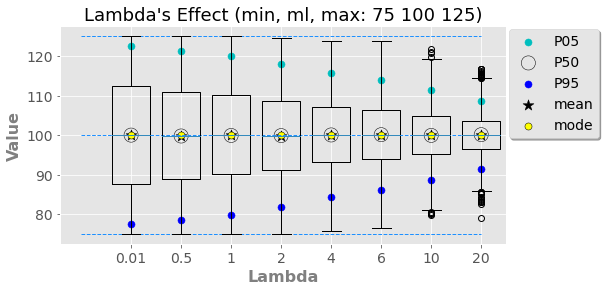

In [7]:
list=[1,2,3,4,5,6,7,8]                              # There are 8 Lambdas being compared
mode=[bml2, bml2,bml2,bml2,bml2,bml2,bml2,bml2]     # These are the 8 Beta Most-Likely method 2 inputs (bml2)

figdata=[fbvals_1, fbvals_50, fbvals_100, fbvals_200, fbvals_400, fbvals_600, fbvals_1000, fbvals_2000]
fig = plt.figure(figsize=(8,4))
plt.boxplot(figdata, widths=.75) # patch_artist=True


plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['0.01','0.5','1','2','4', '6', '10', '20'])
plt.scatter(list, df_stats_beta['P05'],  s= 50, c='c',label='P05')
plt.scatter(list, df_stats_beta['P50'], s= 200, facecolor='none', edgecolor='k', label='P50')
plt.scatter(list, df_stats_beta['P95'],  s= 50, c='b', facecolor='none', edgecolor='b', label='P95')
plt.scatter(list, df_stats_beta['mean'], marker ='*', s= 130, c='k', label='mean')
plt.scatter(list, mode,  s= 50, facecolor='yellow', edgecolor='k', label='mode')
# plt.scatter(list, df_mode['x'],  s= 50, facecolor='yellow', edgecolor='k', label='mode')
plt.legend(shadow=True, fontsize=14, bbox_to_anchor=(.99, 1.02))

plt.title("Lambda's Effect (min, ml, max: "+ str(amin)+' '+str(bml)+' ' + str(cmax)+')', fontsize=18)
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Value', fontsize =16, fontweight='bold', color='gray')

plt.hlines(amin, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(bml, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(cmax, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.show()

### Examine Dispersion of Asymmetrical Beta Distributions with various Lambdas using Box Plots
- Note in the Box Plots that the overall range of the Beta Distributions diminishes with increased Lambda
- Remember that a Lambda of 4 is equivalent to method 1 - the originally published method

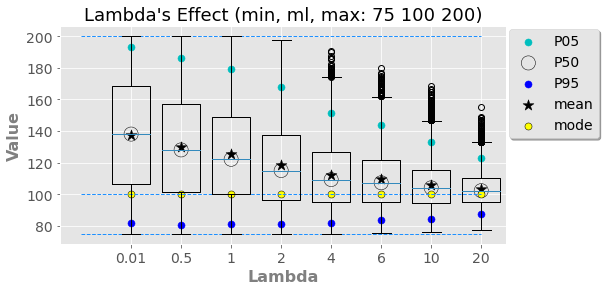

In [8]:
list=[1,2,3,4,5,6,7,8]                                # There are 8 Lambdas being compared
mode=[bml2, bml2,bml2,bml2,bml2,bml2,bml2,bml2]       # These are the 8 Beta Most-Likely method 2 inputs (bml2)

figdata=[fbvals2_1, fbvals2_50, fbvals2_100, fbvals2_200, fbvals2_400, fbvals2_600, fbvals2_1000, fbvals2_2000]
fig = plt.figure(figsize=(8,4))
plt.boxplot(figdata, widths=.75) # patch_artist=True


plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['0.01','0.5','1','2','4', '6', '10', '20'])
plt.scatter(list, df_stats_beta2['P05'],  s= 50, c='c',label='P05')
plt.scatter(list, df_stats_beta2['P50'], s= 200, facecolor='none', edgecolor='k', label='P50')
plt.scatter(list, df_stats_beta2['P95'],  s= 50, c='b', facecolor='none', edgecolor='b', label='P95')
plt.scatter(list, df_stats_beta2['mean'], marker ='*', s= 130, c='k', label='mean')
plt.scatter(list, mode,  s= 50, facecolor='yellow', edgecolor='k', label='mode')
# plt.scatter(list, df_mode['x'],  s= 50, facecolor='yellow', edgecolor='k', label='mode')
plt.legend(shadow=True, fontsize=14, bbox_to_anchor=(.99, 1.02))

plt.title("Lambda's Effect (min, ml, max: "+ str(amin2)+' '+str(bml2)+' ' + str(cmax2)+')', fontsize=18)
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Value', fontsize =16, fontweight='bold', color='gray')

plt.hlines(amin2, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(bml2, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(cmax2, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.show()